## **TP4- Analyse Market Basket**



**The dataset contains three CSV files:**

1. `olist_order_items_dataset.csv`
2. `olist_products_dataset.csv`
3. `product_category_name_translation.csv`

**The column definitions are as follows:**

`olist_order_items_dataset.csv`:

- `order_id`: The unique identifier for a transaction.
- `order_item_id`: The order of an item within a transaction.
- `product_id`: The unique identifier for a product.
- `price`: The product's price.

`olist_products_dataset.csv`:

- `product_id`: The unique identifier for a product.
- `product_category_name`: The name of an item's product category in Portuguese.
- `product_weight_g`: The product's weight in grams.
- `product_length_cm`: The product's length in centimeters.
- `product_width_cm`: The product's width in centimeters.
- `product_height_cm`: The product's height in centimeters.

`product_category_name_translation.csv`:

- `product_category_name`: The name of an item's product category in Portuguese.
- `product_category_name_english`: The name of an item's product category in English.


## **Data preparation**

The first step is to determine what constitutes an **item**, an **itemset**, and a **transaction**. 

**What is an item**?
  * A product purchased from Olist.

**What is an itemset?**
  * A collection of one or more product(s).

**What is a transaction?**
  * An itemset that corresponds to a customer's order.

In [1]:
# Import numpy.
import numpy as np

In [2]:
# Import Pandas
import pandas as pd

In [3]:
# Import matplotlib
import matplotlib.pyplot as plt

In [4]:
#import seaborn as sns
import seaborn as sns

In [5]:
# Define path to data.
data_path = 'https://github.com/datacamp/Market-Basket-Analysis-in-python-live-training/raw/master/data/'

In [6]:
# Load orders dataset.
orders = pd.read_csv(data_path+'olist_order_items_dataset.csv')

# Load products items dataset.
products = pd.read_csv(data_path+'olist_products_dataset.csv')

# Load translations dataset.
translations = pd.read_csv(data_path+'product_category_name_translation.csv')

In [10]:
# Print orders header.
print(orders.columns)

Index(['order_id', 'order_item_id', 'product_id', 'price'], dtype='object')


In [9]:
# Print orders info.
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB
None


In [12]:
# Print products header.
print(products.columns)

Index(['product_id', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


In [13]:
# Print products info.
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB
None


In [15]:
# Print translations header.
print(translations.columns)

Index(['product_category_name', 'product_category_name_english'], dtype='object')


In [16]:
# Print translations info.
print(translations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


### **Translating item category names**

**The product names are given in Portuguese.**
  * We'll translate the names to English using a `pandas` `DataFrame` named `translations`.
  * `.merge()` performs a join operation on columns or indices.
  * `on` is the column on which to perform the join.
  * `how` specifies which keys to use to perform the join. 

In [20]:
# Translate product names to English. The idea is to merge products and translations
products= pd.merge(products, translations, on='product_category_name', how='left')

# Print English names.
print(products['product_category_name_english'])

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object


In [21]:
#show the first five lines of products
print(products.head(5))

                         product_id  product_category_name  product_weight_g  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria             225.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes            1000.0   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer             154.0   
3  cef67bcfe19066a932b7673e239eb23d                  bebes             371.0   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas             625.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               16.0               10.0              14.0   
1               30.0               18.0              20.0   
2               18.0                9.0              15.0   
3               26.0                4.0              26.0   
4               20.0               17.0              13.0   

  product_category_name_english_x product_category_name_english_y  \
0                         perfume                         perfume   
1             

### **Convert product IDs to product category names.**

**We can work with product IDs directly, but do not have product names.**
  * Map product IDs to product category names, which are available in `products`.
  * Use another `.merge()` with `orders` and subset of `products` columns.
  
**Using category names will also simplify the analysis, since there are fewer categories than products.**

In [27]:
# Define product category name in orders DataFrame.
orders = pd.merge(orders, products[['product_id', 'product_category_name']], on='product_id', how='left')

# Print the first few rows of the resulting DataFrame to verify
print(orders.head(5))

                           order_id  order_item_id  \
0  b8bfa12431142333a0c84802f9529d87              1   
1  b8bfa12431142333a0c84802f9529d87              2   
2  b8bfa12431142333a0c84802f9529d87              3   
3  00010242fe8c5a6d1ba2dd792cb16214              1   
4  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id  price product_category_name  
0  765a8070ece0f1383d0f5faf913dfb9b   81.0         esporte_lazer  
1  a41e356c76fab66334f36de622ecbd3a   99.3                   NaN  
2  765a8070ece0f1383d0f5faf913dfb9b   81.0         esporte_lazer  
3  4244733e06e7ecb4970a6e2683c13e61   58.9            cool_stuff  
4  e5f2d52b802189ee658865ca93d83a8f  239.9              pet_shop  


In [28]:
# Print orders header.
orders.head()

,order_id,order_item_id,product_id,price,product_category_name
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0,esporte_lazer
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3,NaN
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0,esporte_lazer
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,pet_shop


In [29]:
# Drop products without a defined category from the orders dataframe.
orders.dropna(subset=['product_category_name'], inplace=True)

In [33]:
# Print number of unique items.
print(orders['order_id'].nunique())

97277


In [32]:
# Print number of unique categories.
print(orders['product_category_name'].nunique())

73


### **Construct transactions from order and product data**

* **We will perform Market Basket Analysis on transactions.**
  * A transaction consists of the unique items purchased by a customer.
* **Need to extract transactions from orders `DataFrame`.**
  * Group all items in an order.

In [34]:
# Identify transactions associated with example order: order_id equals fe64170e936bc5f6a6a41def260984b9. The idea is to extract 
# all products categories for a specific order. 
example_order = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']
example1 = example_order['product_category_name'].tolist()

# Print example.
print(example1)

['cama_mesa_banho', 'moveis_decoracao']


In [35]:
# Identify transactions associated with example order: order_id equals fffb9224b6fc7c43ebb0904318b10b5f. The idea is to extract 
# all products categories for a specific order.
example_order = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']
example2 = example_order['product_category_name'].tolist()

# Print example.
print(example2)

['relogios_presentes', 'relogios_presentes', 'relogios_presentes', 'relogios_presentes']


**Insight**: Aggregation reduces the number of items and, therefore, itemsets.

**Map `orders` to `transactions`.**
* `.groupby()` splits a `DataFrame` into groups according to some criterion.
* `.unique()` returns list of unique values.

In [36]:
# Recover transaction itemsets from orders DataFrame.
transactions = orders.groupby('order_id')['product_category_name'].unique()
# Print transactions header.
print(transactions.head())

order_id
00010242fe8c5a6d1ba2dd792cb16214            [cool_stuff]
00018f77f2f0320c557190d7a144bdd3              [pet_shop]
000229ec398224ef6ca0657da4fc703e      [moveis_decoracao]
00024acbcdf0a6daa1e931b038114c75            [perfumaria]
00042b26cf59d7ce69dfabb4e55b4fd9    [ferramentas_jardim]
Name: product_category_name, dtype: object


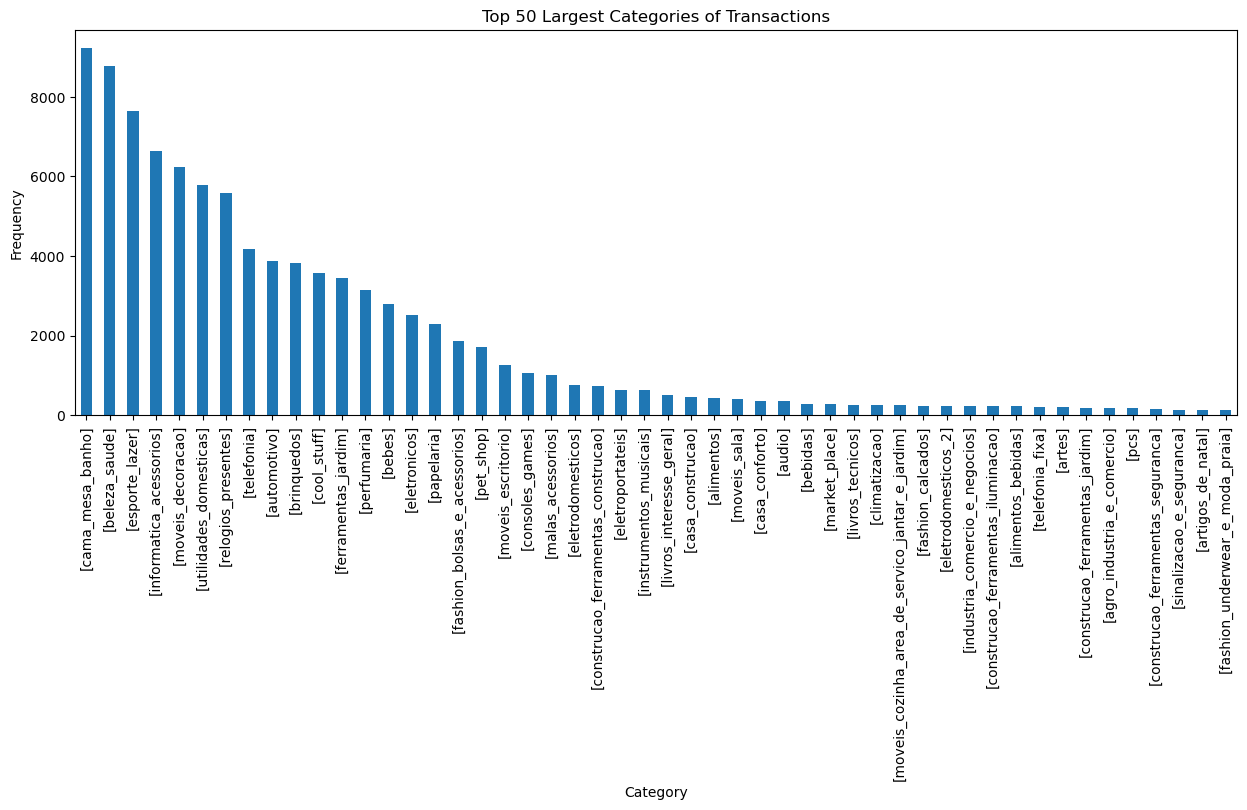

In [38]:
# Plot 50 largest categories of transactions.
top_50_categories = transactions.value_counts()[:50]

top_50_categories.plot(kind='bar', figsize=(15,5))
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Top 50 Largest Categories of Transactions')
plt.show()

**Use `.tolist()` to transform a `DataFrame` or `Series` object into a list.**

In [39]:
# Convert the pandas series to list of lists.
transactions = transactions.apply(lambda x: x.tolist()).tolist()

In [40]:
# print transaction
print(transactions)

[['cool_stuff'], ['pet_shop'], ['moveis_decoracao'], ['perfumaria'], ['ferramentas_jardim'], ['utilidades_domesticas'], ['telefonia'], ['ferramentas_jardim'], ['beleza_saude'], ['livros_tecnicos'], ['beleza_saude'], ['fashion_bolsas_e_acessorios'], ['cama_mesa_banho'], ['ferramentas_jardim'], ['esporte_lazer'], ['consoles_games'], ['perfumaria'], ['esporte_lazer'], ['cool_stuff'], ['cama_mesa_banho'], ['telefonia'], ['moveis_escritorio'], ['fashion_bolsas_e_acessorios'], ['cool_stuff'], ['esporte_lazer'], ['malas_acessorios'], ['moveis_decoracao'], ['alimentos'], ['moveis_decoracao'], ['agro_industria_e_comercio'], ['moveis_decoracao'], ['esporte_lazer'], ['telefonia'], ['eletronicos'], ['cama_mesa_banho'], ['ferramentas_jardim'], ['informatica_acessorios'], ['cool_stuff'], ['moveis_decoracao'], ['eletronicos'], ['construcao_ferramentas_construcao'], ['informatica_acessorios'], ['cama_mesa_banho'], ['beleza_saude'], ['pet_shop'], ['cama_mesa_banho'], ['informatica_acessorios'], ['belez

### **Summarize final transaction data**

In [41]:
# Print length of transactions.
print(len(transactions))

97277


In [44]:
# Count number of unique item categories for each transaction.
counts = [len(set(transaction)) for transaction in transactions]

In [45]:
# print counts
counts

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [46]:
# Print median number of items in a transaction using np.median .
median_items = np.median(counts)
print("Median number of items in a transaction:", median_items)

Median number of items in a transaction: 1.0


In [47]:
# Print maximum number of items in a transaction using np.max.
max_items = np.max(counts)
print("Maximum number of items in a transaction:", max_items)

Maximum number of items in a transaction: 3
